In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [3]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [4]:
df = pd.read_csv('Data/fifa_world_cup_2022_tweets.csv')
df

,Unnamed: 0,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment
0,0,2022-11-20 23:59:21+00:00,4,Twitter Web App,What are we drinking today @TucanTribe \n@MadB...,neutral
1,1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,positive
2,2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 htt...,positive
3,3,2022-11-20 23:58:33+00:00,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/...,positive
4,4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"If the BBC cares so much about human rights, h...",negative
...,...,...,...,...,...,...
22519,22519,2022-11-20 00:00:21+00:00,1,Twitter Web App,Here We go World cup 2022 #WorldCup2022,positive
22520,22520,2022-11-20 00:00:03+00:00,0,DenetPro,Anderlecht confirms former Viborg FF's Jesper ...,neutral
22521,22521,2022-11-20 00:00:01+00:00,2,Twitter for iPhone,Great thread to read before the start of #Worl...,positive
22522,22522,2022-11-20 00:00:00+00:00,11,Twitter Web App,Raphinha wants Brazil to be united at the #Wor...,positive


In [5]:
df.columns

Index(['Unnamed: 0', 'Date Created', 'Number of Likes', 'Source of Tweet',
       'Tweet', 'Sentiment'],
      dtype='object')

In [6]:
data = df.drop(['Unnamed: 0', 'Date Created', 'Number of Likes', 'Source of Tweet','Sentiment'], axis=1)
data.head()

,Tweet
0,What are we drinking today @TucanTribe \n@MadB...
1,Amazing @CanadaSoccerEN #WorldCup2022 launch ...
2,Worth reading while watching #WorldCup2022 htt...
3,Golden Maknae shinning bright\n\nhttps://t.co/...
4,"If the BBC cares so much about human rights, h..."


In [7]:
data

,Tweet
0,What are we drinking today @TucanTribe \n@MadB...
1,Amazing @CanadaSoccerEN #WorldCup2022 launch ...
2,Worth reading while watching #WorldCup2022 htt...
3,Golden Maknae shinning bright\n\nhttps://t.co/...
4,"If the BBC cares so much about human rights, h..."
...,...
22519,Here We go World cup 2022 #WorldCup2022
22520,Anderlecht confirms former Viborg FF's Jesper ...
22521,Great thread to read before the start of #Worl...
22522,Raphinha wants Brazil to be united at the #Wor...


In [8]:
def DataProcessing(text):

    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filteredText = [w for w in text_tokens if not w in stop_words]
    return ' '.join(filteredText)


In [9]:
data.Tweet = data['Tweet'].apply(DataProcessing)

In [10]:
data

,Tweet
0,drinking today tucantribe madbears_ lkinc_algo...
1,amazing canadasocceren worldcup2022 launch vid...
2,worth reading watching worldcup2022
3,golden maknae shinning bright jeonjungkook jun...
4,bbc cares much human rights homosexual rights ...
...,...
22519,go world cup 2022 worldcup2022
22520,anderlecht confirms former viborg ffs jesper f...
22521,great thread read start worldcup2022
22522,raphinha wants brazil united worldcup2022


In [11]:
data = data.drop_duplicates('Tweet')

In [12]:
data

,Tweet
0,drinking today tucantribe madbears_ lkinc_algo...
1,amazing canadasocceren worldcup2022 launch vid...
2,worth reading watching worldcup2022
3,golden maknae shinning bright jeonjungkook jun...
4,bbc cares much human rights homosexual rights ...
...,...
22519,go world cup 2022 worldcup2022
22520,anderlecht confirms former viborg ffs jesper f...
22521,great thread read start worldcup2022
22522,raphinha wants brazil united worldcup2022


In [13]:
stemmer = PorterStemmer()
def stemming(tweet):
    text = [stemmer.stem(word) for word in tweet]
    return tweet

In [14]:
data['Tweet'] = data['Tweet'].apply(lambda x: stemming(x))

C:\Users\walee\AppData\Local\Temp\ipykernel_12320\3887870051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Tweet'] = data['Tweet'].apply(lambda x: stemming(x))


In [15]:
data

,Tweet
0,drinking today tucantribe madbears_ lkinc_algo...
1,amazing canadasocceren worldcup2022 launch vid...
2,worth reading watching worldcup2022
3,golden maknae shinning bright jeonjungkook jun...
4,bbc cares much human rights homosexual rights ...
...,...
22519,go world cup 2022 worldcup2022
22520,anderlecht confirms former viborg ffs jesper f...
22521,great thread read start worldcup2022
22522,raphinha wants brazil united worldcup2022


In [16]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [17]:
data['polarity'] = data['Tweet'].apply(polarity)

C:\Users\walee\AppData\Local\Temp\ipykernel_12320\2346692892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['polarity'] = data['Tweet'].apply(polarity)


In [18]:
data

,Tweet,polarity
0,drinking today tucantribe madbears_ lkinc_algo...,0.000000
1,amazing canadasocceren worldcup2022 launch vid...,0.225000
2,worth reading watching worldcup2022,0.300000
3,golden maknae shinning bright jeonjungkook jun...,0.500000
4,bbc cares much human rights homosexual rights ...,0.000000
...,...,...
22519,go world cup 2022 worldcup2022,0.000000
22520,anderlecht confirms former viborg ffs jesper f...,0.000000
22521,great thread read start worldcup2022,0.800000
22522,raphinha wants brazil united worldcup2022,0.200000


In [19]:
def sentiment(label):
    if label <0:
        return 'Negative'
    elif label == 0:
        return 'Neutral'
    elif label >0:
        return 'Positive'

In [20]:
data['Sentiment'] = data['polarity'].apply(sentiment)

C:\Users\walee\AppData\Local\Temp\ipykernel_12320\2167108398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sentiment'] = data['polarity'].apply(sentiment)


In [21]:
data.head(20)

,Tweet,polarity,Sentiment
0,drinking today tucantribe madbears_ lkinc_algo...,0.000000,Neutral
1,amazing canadasocceren worldcup2022 launch vid...,0.225000,Positive
2,worth reading watching worldcup2022,0.300000,Positive
3,golden maknae shinning bright jeonjungkook jun...,0.500000,Positive
4,bbc cares much human rights homosexual rights ...,0.000000,Neutral
5,like mexican fans able scream puto homophobic ...,0.250000,Positive
6,look like jamaican football team naw follow wo...,0.000000,Neutral
7,really football monday morning 9 12 3 need pin...,0.200000,Positive
8,world cup starts qatar black awareness day bra...,-0.166667,Negative
9,worldcup2022 itvsport amp lfsystemmusic go tog...,0.500000,Positive


In [22]:
data['Sentiment'].value_counts()

Sentiment
Positive    9127
Neutral     8786
Negative    3432
Name: count, dtype: int64

<Axes: xlabel='Sentiment', ylabel='count'>

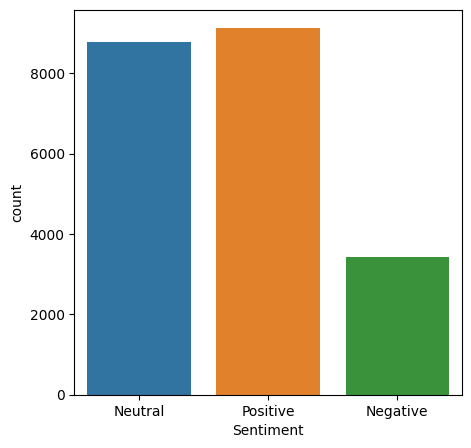

In [23]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='Sentiment', data =data)

In [24]:
pos_tweets = data[data.Sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,Tweet,polarity,Sentiment
10604,fifa world cup go best luck teams fifaworldcup...,1.0,Positive
1814,five best websites working making money online...,1.0,Positive
22175,picture perfect one dance 2 worldcup2022 messi...,1.0,Positive
17867,another blow worldcup2022 one worlds best players,1.0,Positive
11799,qatar fifa foxsports im support usmnt im suppo...,1.0,Positive


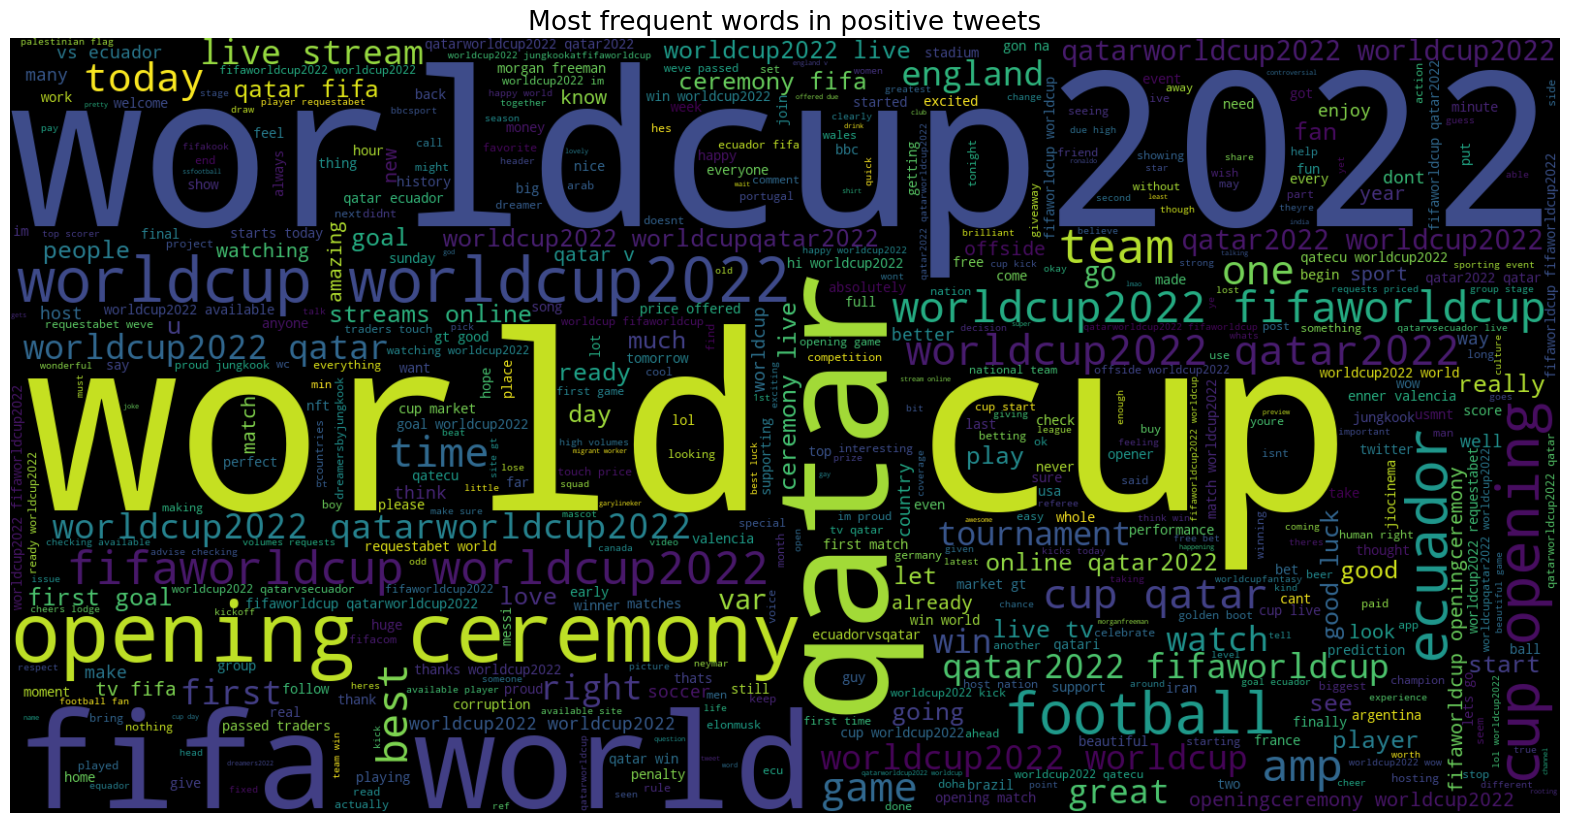

In [25]:
text = ' '.join([word for word in pos_tweets['Tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [26]:
neg_tweets = data[data.Sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,Tweet,polarity,Sentiment
6148,fun fact host team 92 year history world cup l...,-4.625929e-18,Negative
12446,fun fact 92 year history world cup host never ...,-9.251859e-18,Negative
3237,exciting game far soccerpinnipeds worldcup2022,-9.251859e-18,Negative
3641,qatar really playing today dont think shot goa...,-1.387779e-17,Negative
3417,qatar ecuator game see difference academy deve...,-1.850372e-17,Negative


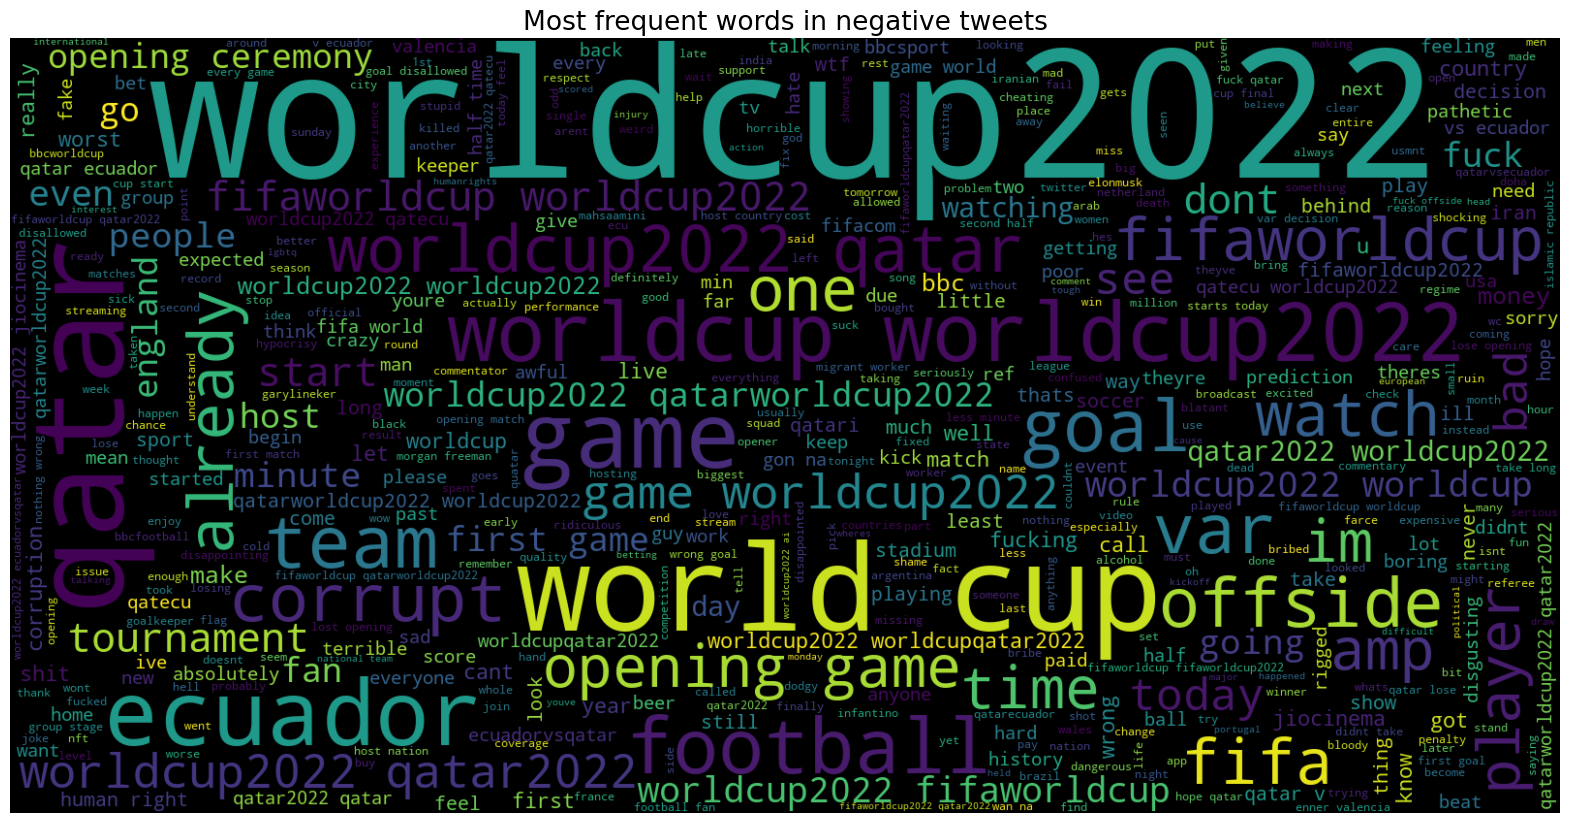

In [27]:
text = ' '.join([word for word in neg_tweets['Tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [28]:
neutral_tweets = data[data.Sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,Tweet,polarity,Sentiment
0,drinking today tucantribe madbears_ lkinc_algo...,0.0,Neutral
14656,1 hour go worldcup2022,0.0,Neutral
14643,thefootballverse worlds2022 worldcup2022 nike ...,0.0,Neutral
14644,yoongi hyungs always matter dreamers2022 jungk...,0.0,Neutral
14645,oh morgan mate involved shitshow worldcup2022,0.0,Neutral


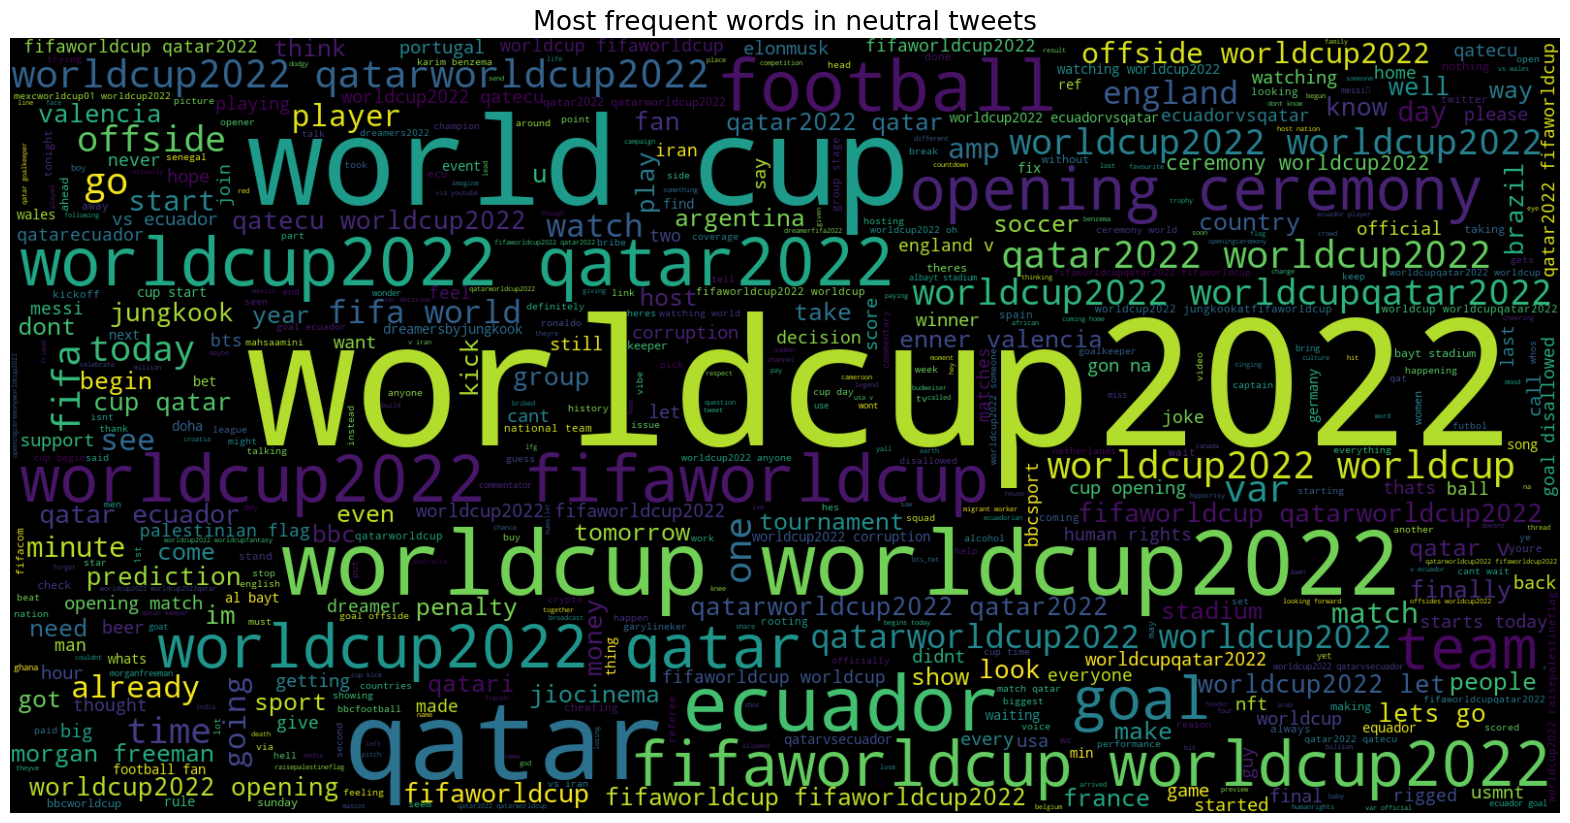

In [29]:
text = ' '.join([word for word in neutral_tweets['Tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

In [30]:
data.head()

,Tweet,polarity,Sentiment
0,drinking today tucantribe madbears_ lkinc_algo...,0.000,Neutral
1,amazing canadasocceren worldcup2022 launch vid...,0.225,Positive
2,worth reading watching worldcup2022,0.300,Positive
3,golden maknae shinning bright jeonjungkook jun...,0.500,Positive
4,bbc cares much human rights homosexual rights ...,0.000,Neutral


In [31]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
cv = CountVectorizer()

In [33]:
x =np.array(data['Tweet'])
y =np.array(data['Sentiment'])
X = cv.fit_transform(x)

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42)

In [35]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
print(accuracy_score(logreg_pred, y_test))
print("Test accuracy: {:.2f}%".format(accuracy_score(logreg_pred, y_test)*100))

0.9280862028578122
Test accuracy: 92.81%


In [36]:
print(logreg_pred[5])
print(y_test[5])

Positive
Positive


In [37]:
sample = input('Enter a text: ')
model_test = cv.transform([sample]).toarray()
print(logreg.predict(model_test))

Enter a text:  Great job


['Positive']
